In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from skimage import io
from minisom import MiniSom

In [33]:
df = pd.read_csv('Minggu 7/data/Mall_Customers.csv')

df.drop(['CustomerID'], axis=1, inplace=True)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Mengambil fitur annual income dan spending score

In [34]:
X = df.iloc[:, 2:]
y = df.iloc[:, :1]

#### Melakukan fit transformasi data pada annual income untuk menyamanakan rentang

In [35]:
sc = StandardScaler()

X = sc.fit_transform(X)

#### Mengubah nilai fale male menjadi 0 / 1

In [36]:
le = LabelEncoder()

y = le.fit_transform(y)

/home/vunky-himawan/Documents/Kuliah/Machine Learning/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Menghitung nilai SSE untuk menentukan nilai K

In [37]:
sse = []

K = range(1, 10)

for k in K:
   kmeanModel = KMeans(n_clusters=k)
   kmeanModel.fit(X)
   sse.append(kmeanModel.inertia_)

#### Visualisasi hasil SSE untuk menentukan nilai parameter K

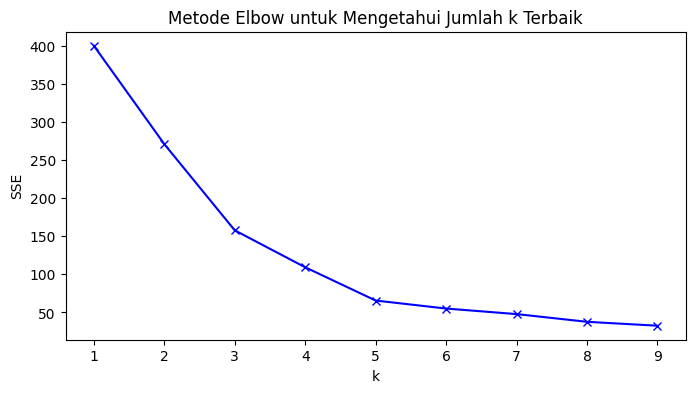

In [38]:
plt.figure(figsize=(8, 4))
plt.plot(K, sse, "bx-")
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Mengetahui Jumlah k Terbaik')
plt.show()

#### SSE

In [39]:
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}, SSE={sse_val}')

k=1, SSE=400.0
k=2, SSE=270.8923594673905
k=3, SSE=157.70400815035944
k=4, SSE=109.22822707921345
k=5, SSE=65.56840815571681
k=6, SSE=55.067795914519664
k=7, SSE=47.78375291290507
k=8, SSE=37.667323037468265
k=9, SSE=32.527615689817196


#### k = 5 digunakan karena pada k = 5 penurunan nilai SSE mulai melambat, tidak seperti sebelumnya yang penurunannya sangat jauh seperti k=1 ke k=2

In [40]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

#### Visualisasi hasil clustering

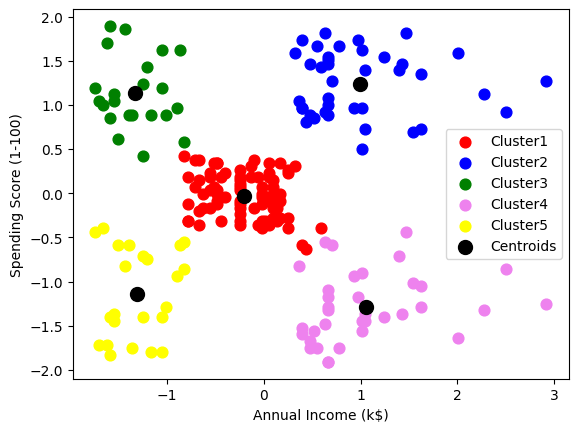

In [41]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
plt.legend() 

plt.show()

#### Load image dan normalisasi

In [42]:
mandrill = io.imread('Minggu 7/images/mandrill.tiff')
mandrill = mandrill.astype(float) / 255

#### Mengubah array image menjadi 2D array

In [43]:
data = mandrill.reshape(-1, 3)

#### Membuat model SOM

In [44]:
som = MiniSom(x=10, y=10, input_len=3, sigma=1.0, learning_rate=0.5) # Membuat model SOM dengan grid 10x10
som.random_weights_init(data)
som.train_random(data, 150) # training model SOM

#### Memetakan piksel ke neuron SOM

In [26]:
mapped = np.array([som.winner(d) for d in data]) # Memetakan setiap piksel ke neuron SOM
new_colors = np.array([som.get_weights()[x, y] for x, y in mapped]) # Mendapatkan warna baru
new_image = new_colors.reshape(mandrill.shape) # Mengubah array 2D menjadi array 3D

#### Visualisasi Gambar

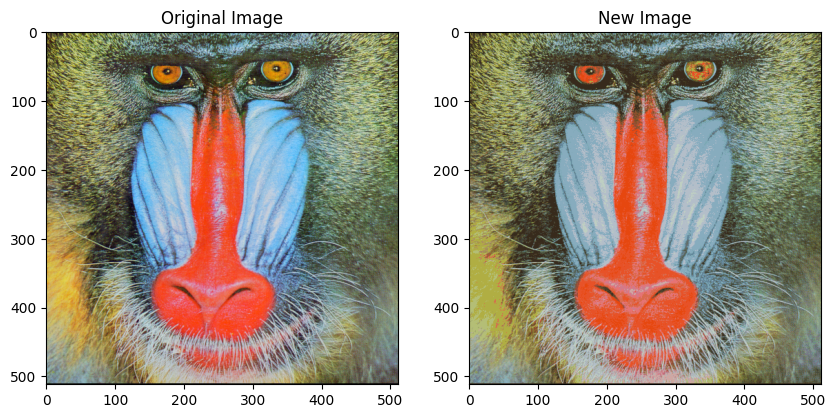

In [27]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(mandrill)

plt.subplot(1, 2, 2)
plt.title("New Image")
plt.imshow(new_image)

plt.show()